# MACHINE LEARNING COSC2673 ASSIGNMENT 1


## AHNAF TAUSIF
## S3890097

    Firstly, we will make the necessary imports and load our train.csv.

In [740]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

data = pd.read_csv('./dataset/train.csv', delimiter=',')

    We will begin my inspecting the data.

In [741]:
data.head()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263,262,264,62,0.01,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271,278,264,64,0.01,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268,246,290,66,0.01,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272,248,296,69,0.01,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275,278,272,71,0.01,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207


## EDA

    We will use the describe() function to see a summary of the statistics of the dataset.


In [742]:
data.describe()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,...,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000
mean,1036.000000,69.274505,95.360212,2009.518590,0.185418,162.833897,161.908257,163.759536,33.079672,4.696379,...,82.727185,5.883858,82.753259,1.632883,7352.742342,1.203741e+07,4.941284,4.977306,0.609551,3.372453
std,597.990524,9.482281,54.861641,4.614147,0.388730,118.872170,119.442235,118.800292,135.832868,4.205888,...,23.188837,2.554965,23.130969,4.782325,15219.978663,6.391797e+07,4.697830,4.785532,0.216532,0.590832
min,1.000000,37.300000,0.000000,2002.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.010000,...,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,518.500000,63.000000,50.000000,2006.000000,0.000000,74.000000,74.000000,74.000000,0.000000,0.615000,...,77.000000,4.190000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,1036.000000,71.200000,94.000000,2010.000000,0.000000,144.000000,142.000000,144.000000,3.000000,3.830000,...,93.000000,5.640000,93.000000,0.100000,1410.670000,6.522310e+05,3.200000,3.300000,0.655000,3.449638
75%,1553.500000,76.000000,144.000000,2014.000000,0.000000,228.000000,228.000000,230.000000,22.000000,7.840000,...,97.000000,7.430000,97.000000,0.800000,5811.295000,5.371104e+06,7.400000,7.400000,0.769500,3.741657
max,2071.000000,92.700000,192.000000,2017.000000,1.000000,699.000000,704.000000,722.000000,1800.000000,17.870000,...,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


    There are no inconsistencies in the data as the count for all the features add up to 2071

    We will now check for any null values in the dataset.

In [743]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            2071 non-null   int64  
 1   TARGET_LifeExpectancy         2071 non-null   float64
 2   Country                       2071 non-null   int64  
 3   Year                          2071 non-null   int64  
 4   Status                        2071 non-null   int64  
 5   AdultMortality                2071 non-null   int64  
 6   AdultMortality-Male           2071 non-null   int64  
 7   AdultMortality-Female         2071 non-null   int64  
 8   SLS                           2071 non-null   int64  
 9   Alcohol                       2071 non-null   float64
 10  PercentageExpenditure         2071 non-null   float64
 11  Measles                       2071 non-null   int64  
 12  BMI                           2071 non-null   float64
 13  Und

    We observed there are no null values to correct and thus can move onto the EDA

    We will now plot the histogram of all the features and observe.


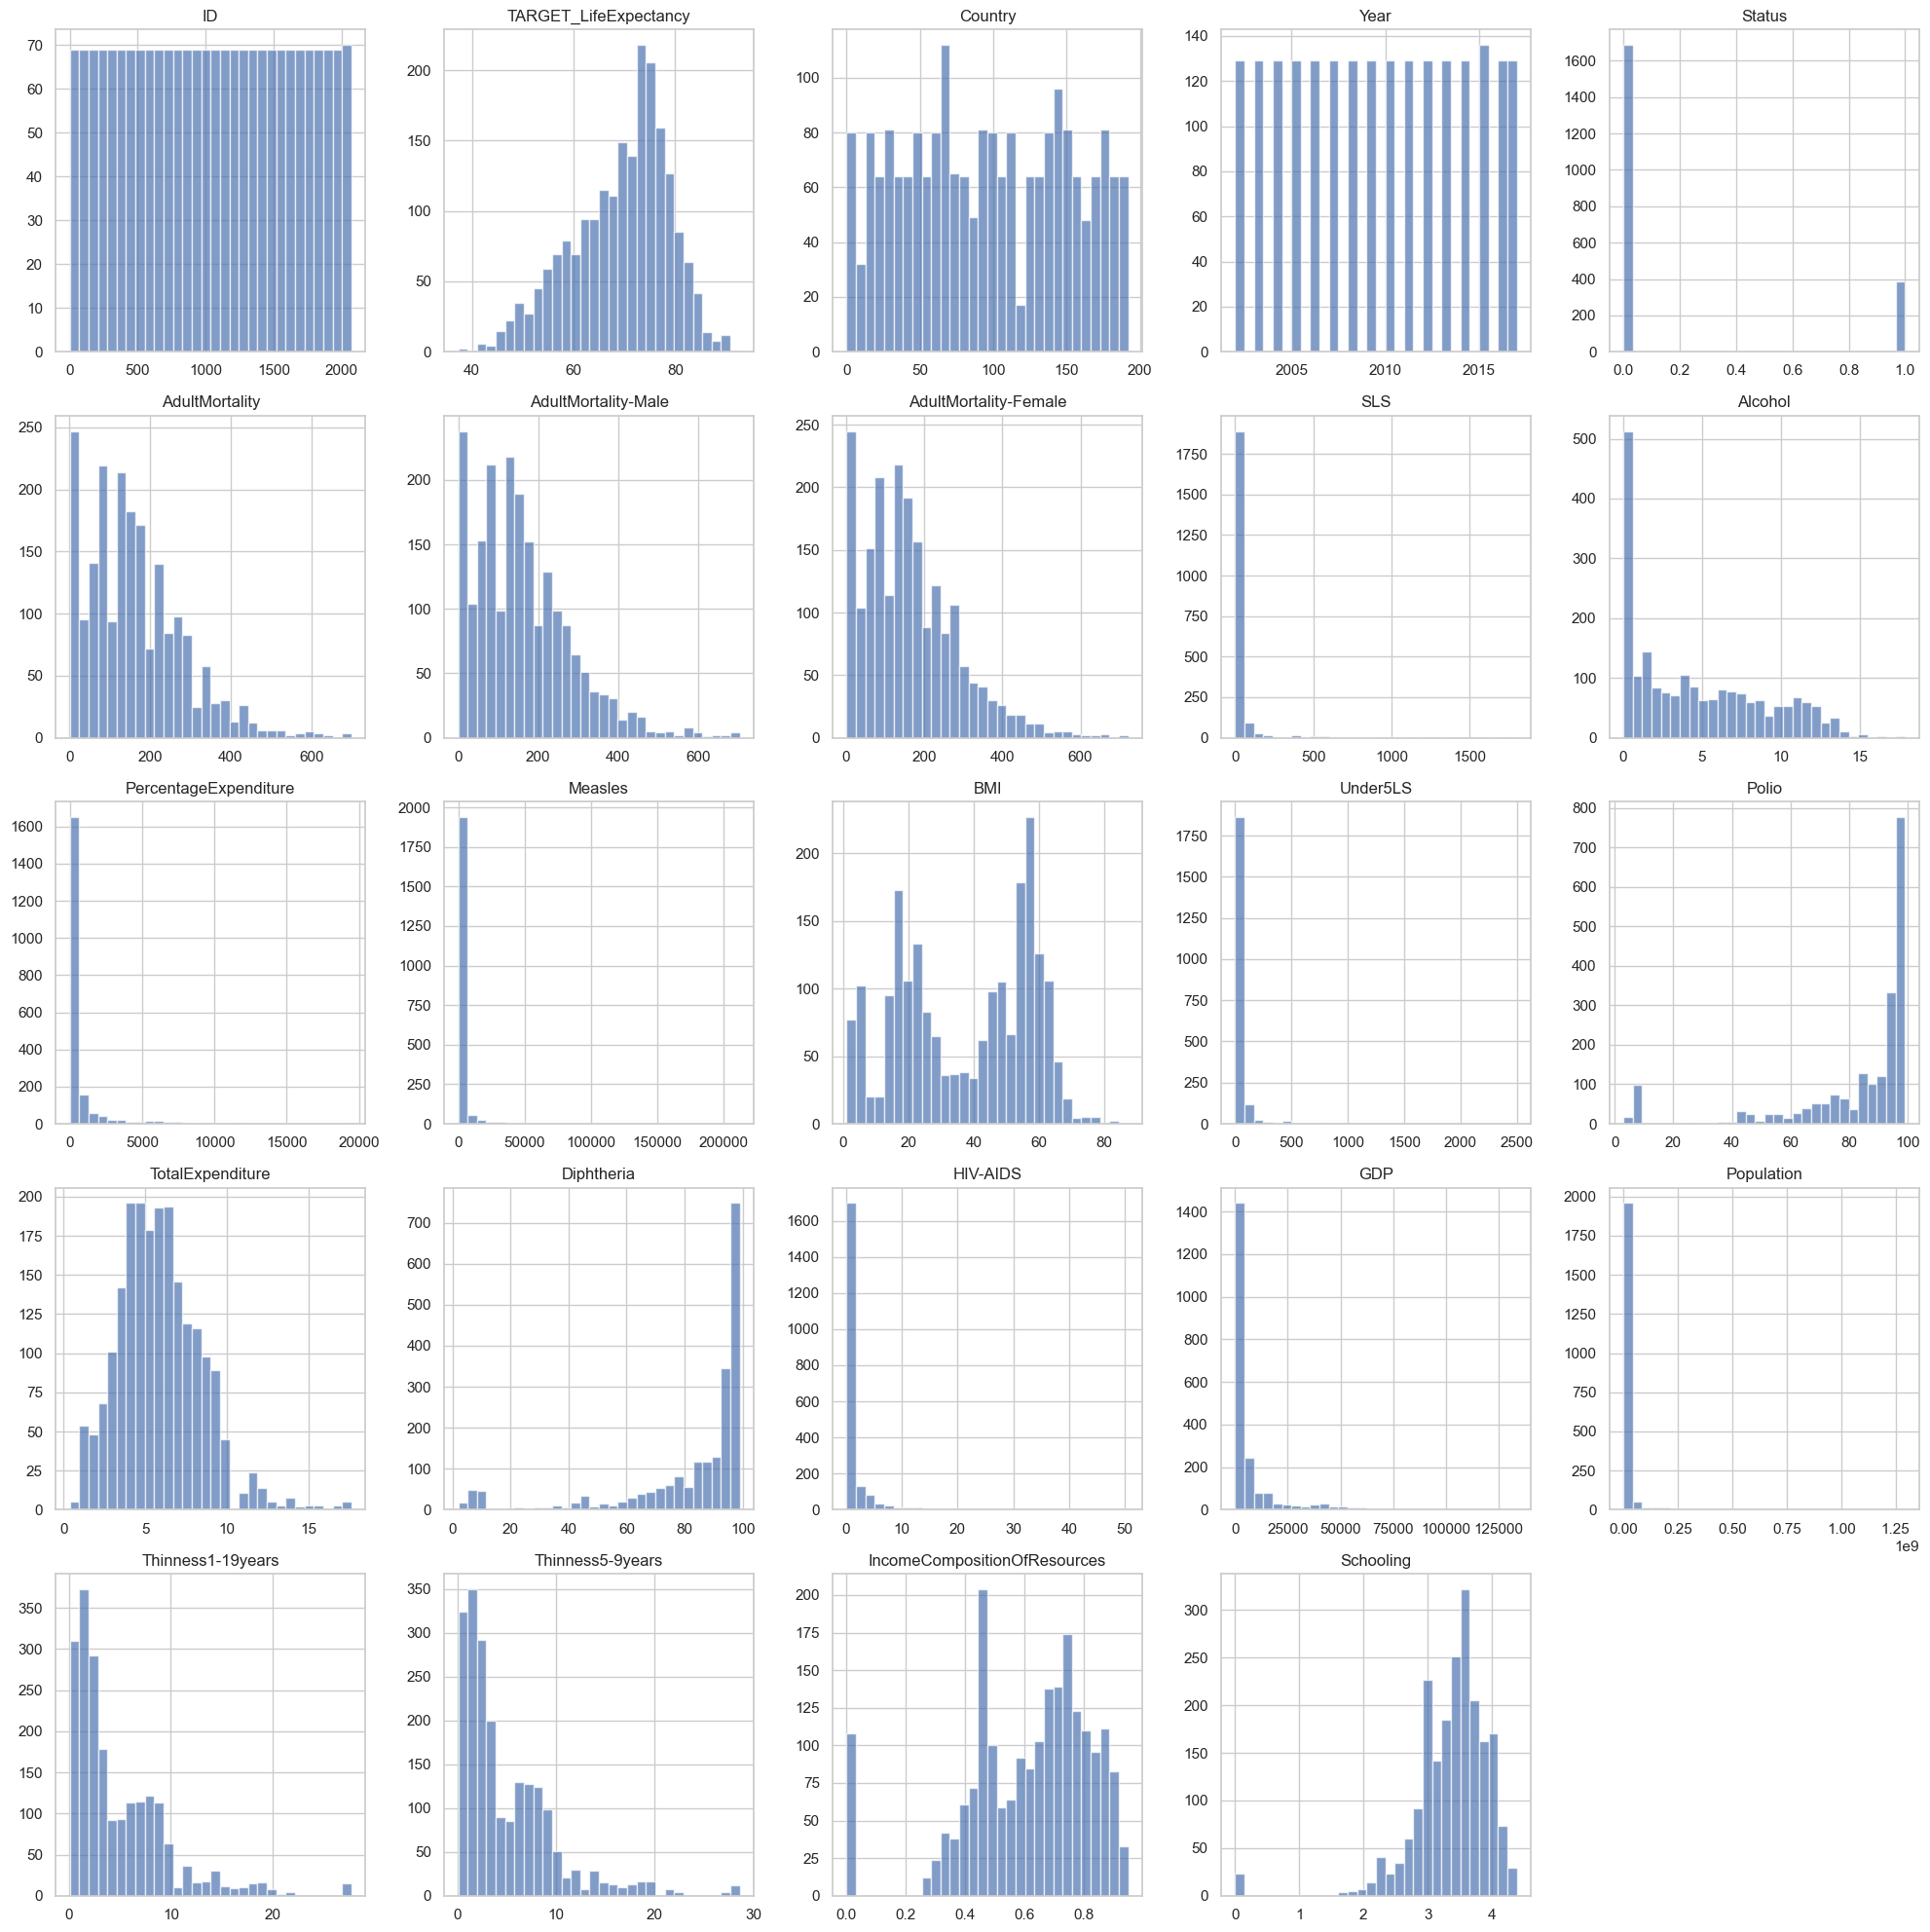

In [744]:
plt.figure(figsize=(20, 20))

# Adjust the number of rows and columns based on the number of columns in the dataset
n_rows = (len(data.columns) + 4) // 5
n_cols = 5

for i, col in enumerate(data.columns):
    plt.subplot(n_rows, n_cols, i+1)
    # Check if the column is numeric to plot a histogram
    if pd.api.types.is_numeric_dtype(data[col]):
        plt.hist(data[col], alpha=0.7, color='b', bins=30)  # density argument removed for actual counts
        plt.title(col)
    else:
        # Non-numeric column, could use a different kind of plot or skip
        plt.text(0.5, 0.5, f'{col} (non-numeric)', horizontalalignment='center', verticalalignment='center')
        plt.axis('off') 

plt.tight_layout() 
plt.show()


    We can observe that some of the features are skewed(adult mortality and alcohol for example).
    We can also observe that status is a categorical feature.
    The scale for a few of the features are too big to have a conclusive observation.

    We will now check the collinearity of the features with target_lifeExpectancy using scatterplot graphs.

In [ ]:


plt.figure(figsize=(20, 20))

# Determine the number of rows needed for subplots based on the number of features
n_rows = len(data.columns) // 5 + (len(data.columns) % 5 > 0)
n_cols = 5

for i, col in enumerate(data.drop('TARGET_LifeExpectancy', axis=1).columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.scatterplot(data=data, x=col, y='TARGET_LifeExpectancy')
    plt.title(col)

plt.xticks(rotation='vertical')
plt.tight_layout() 
plt.show()


    We observe that the features show similar patterns compared to the histograms we plotted above.
    We can observe similar skewness in the features in both the scatter plot and the histograms.
    

    We will now plot a boxplot for all the features to identify if they have outliers.

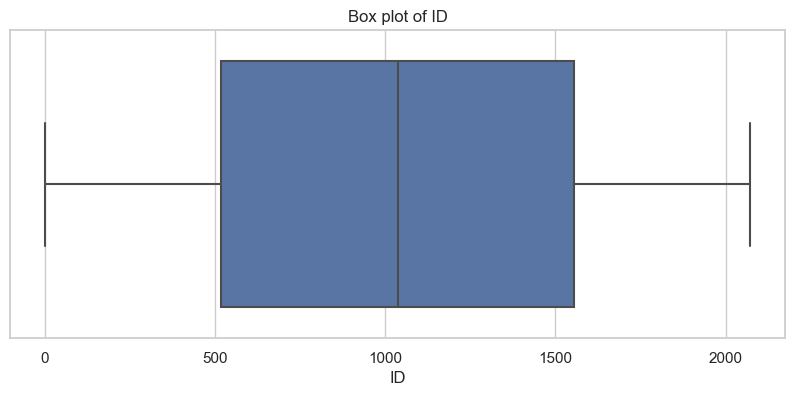

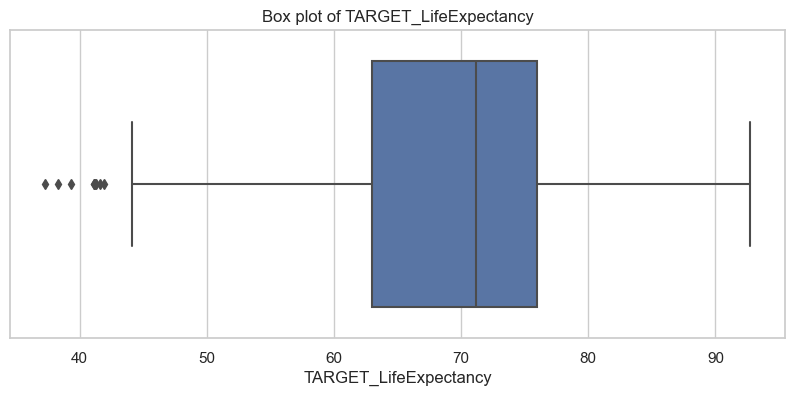

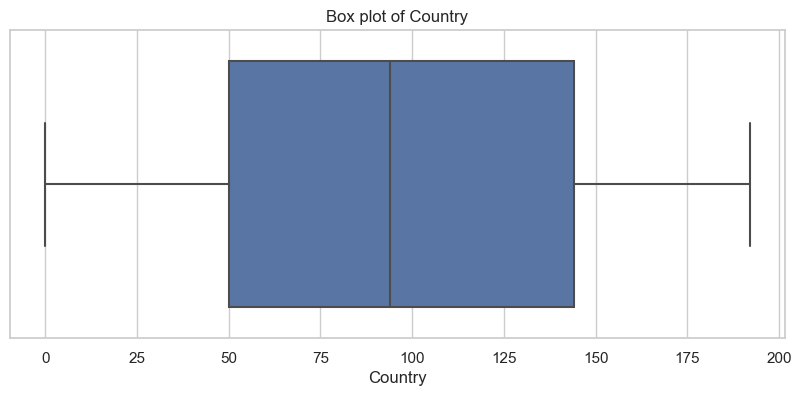

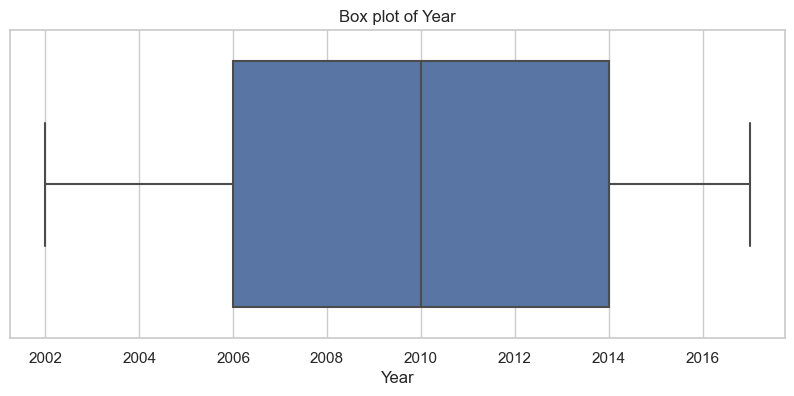

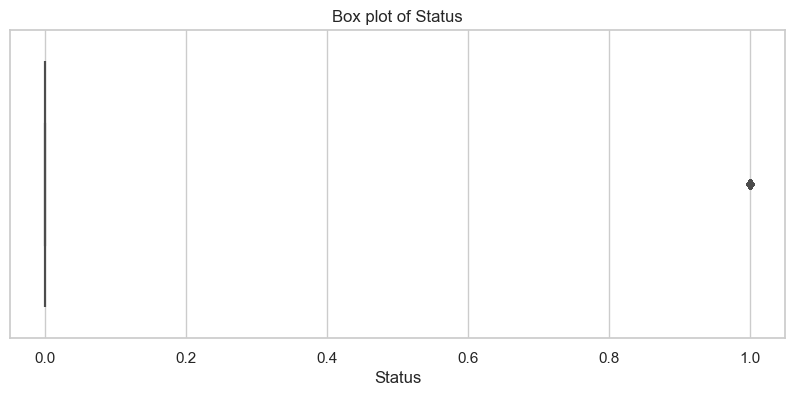

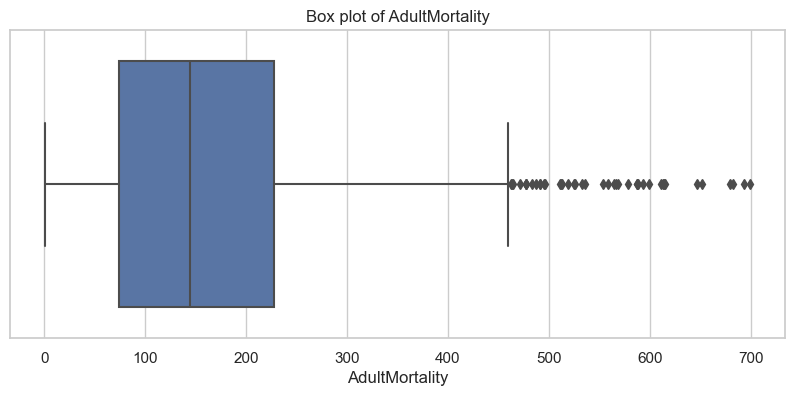

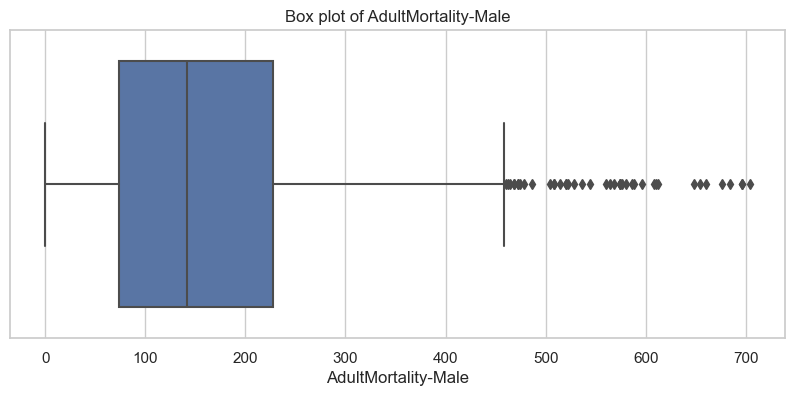

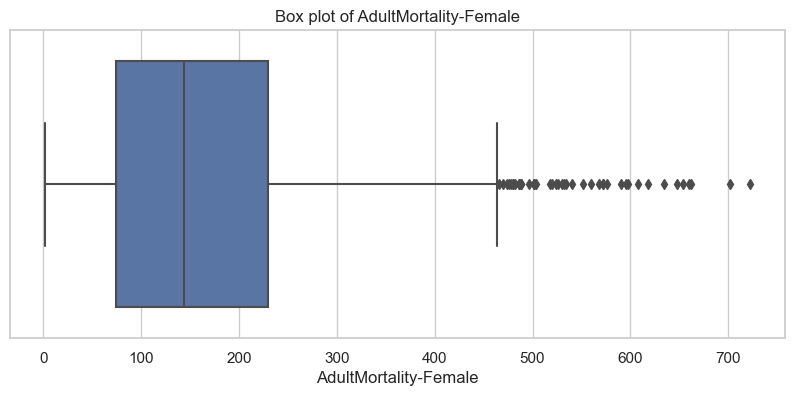

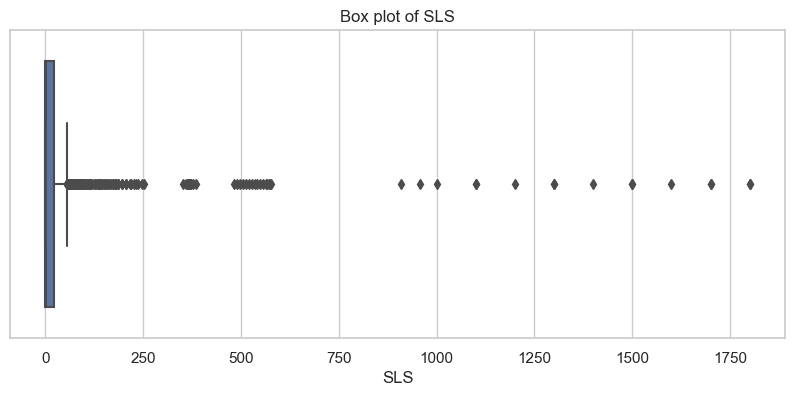

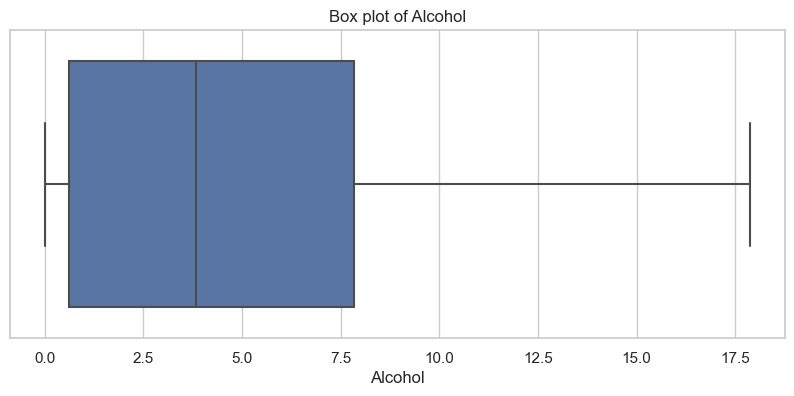

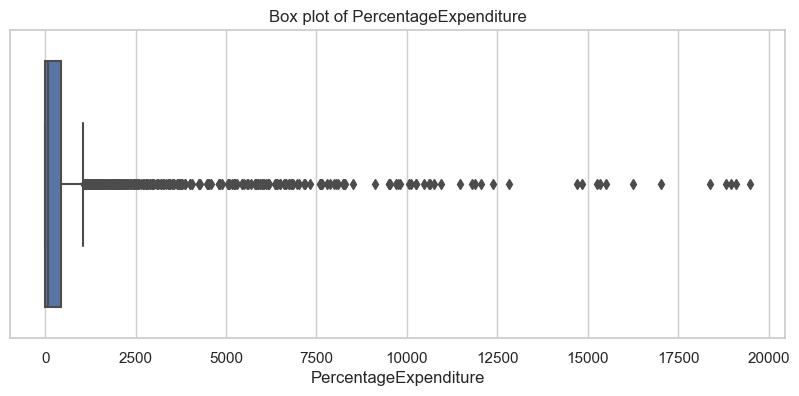

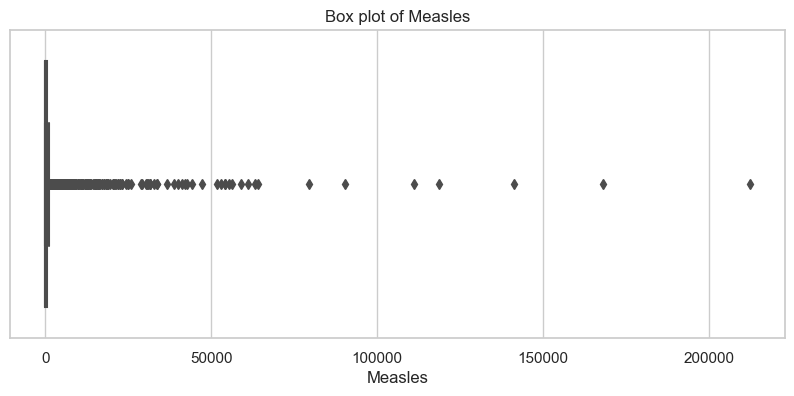

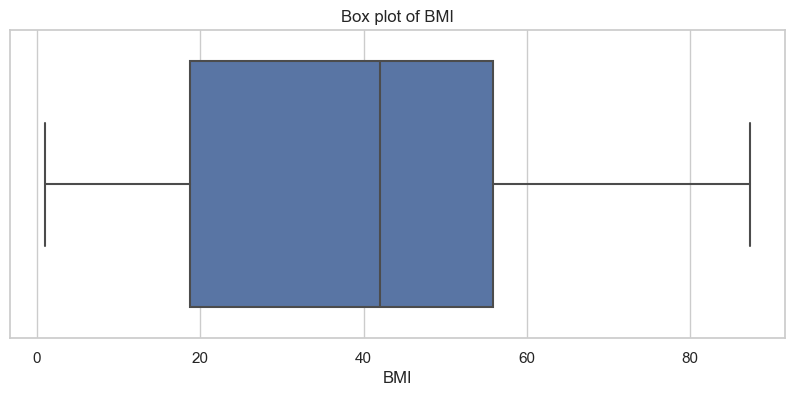

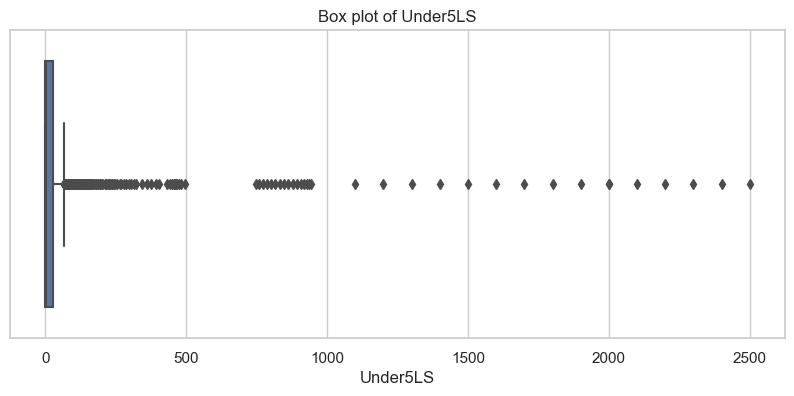

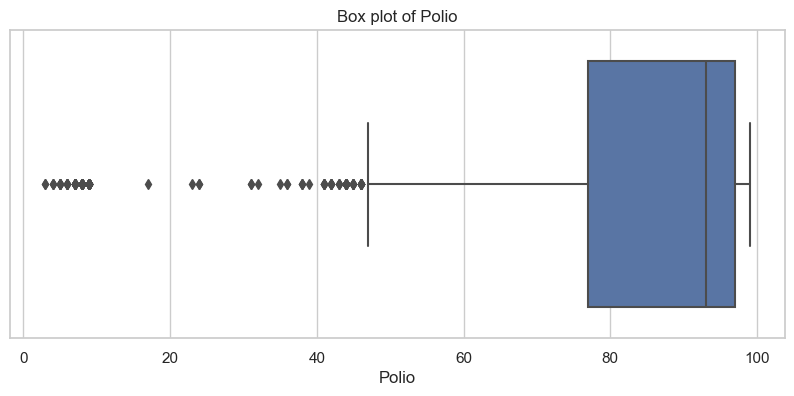

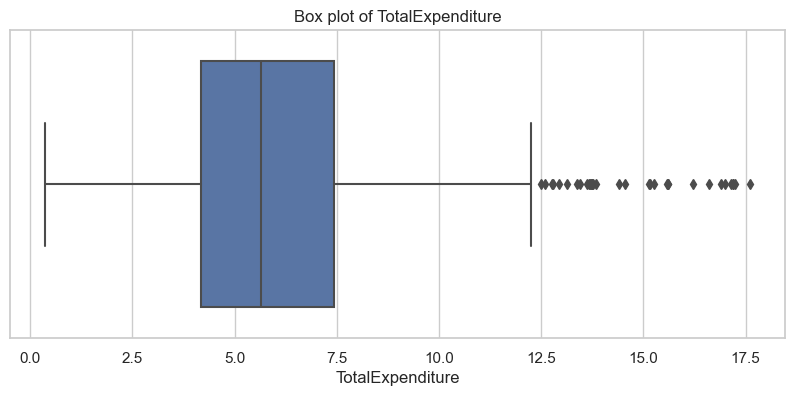

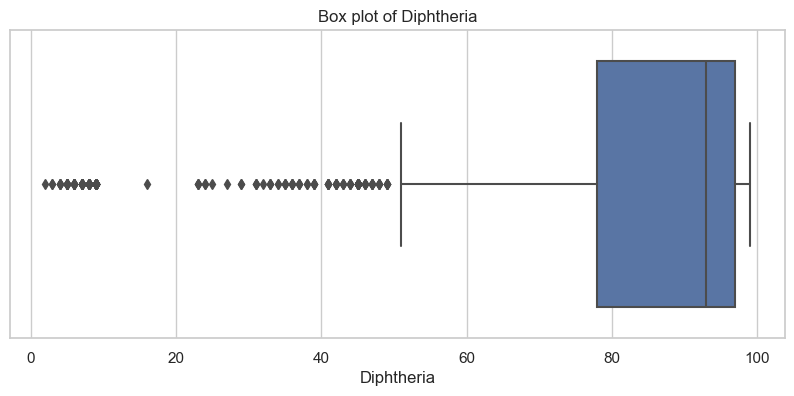

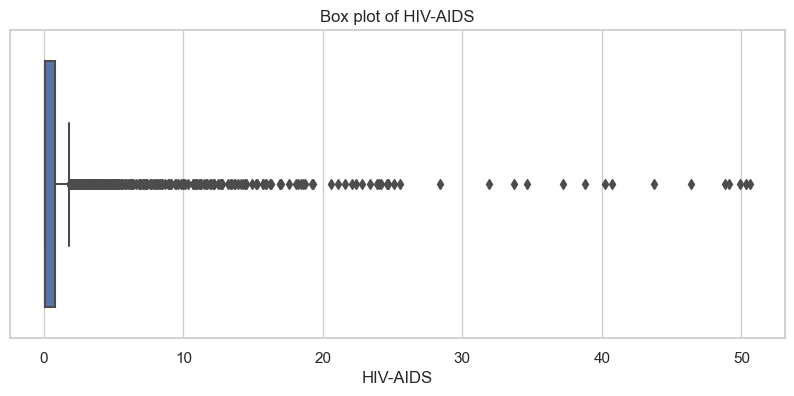

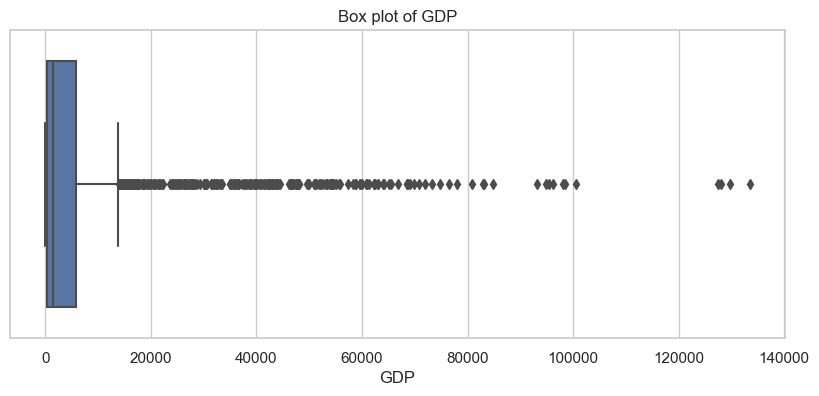

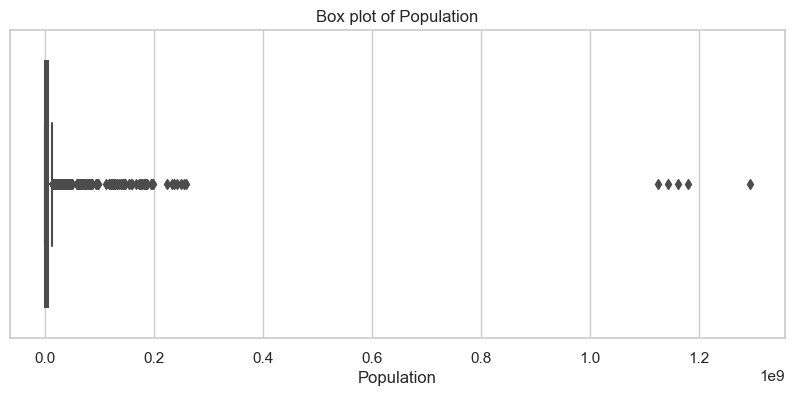

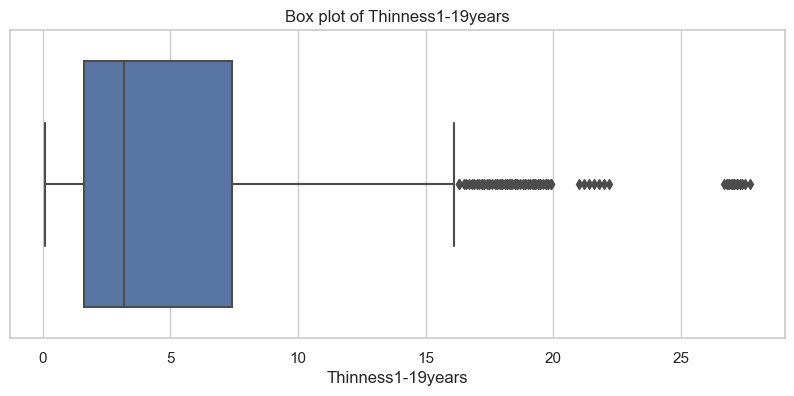

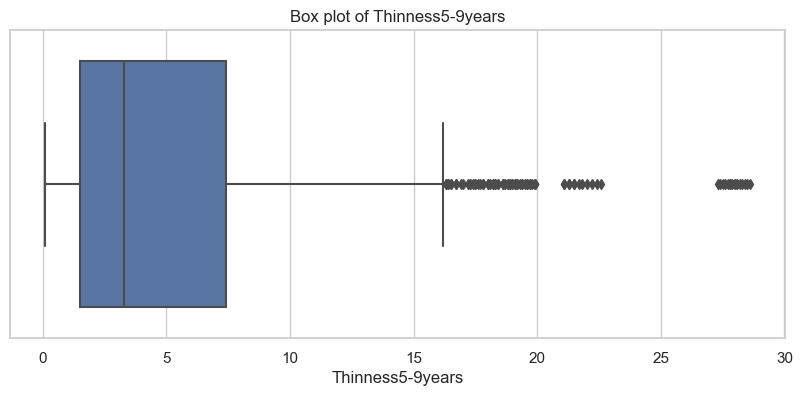

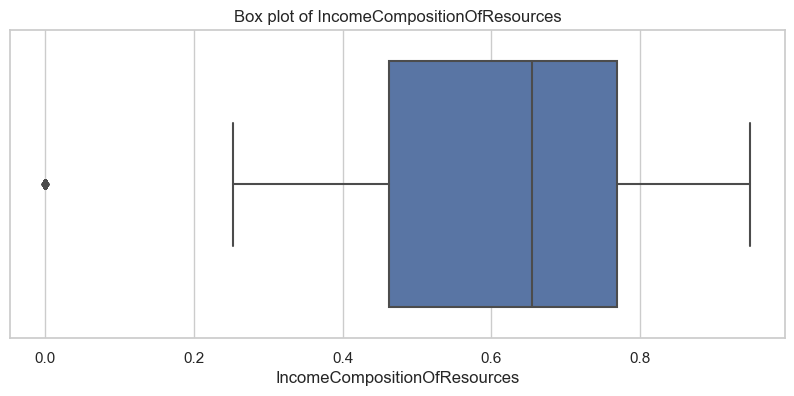

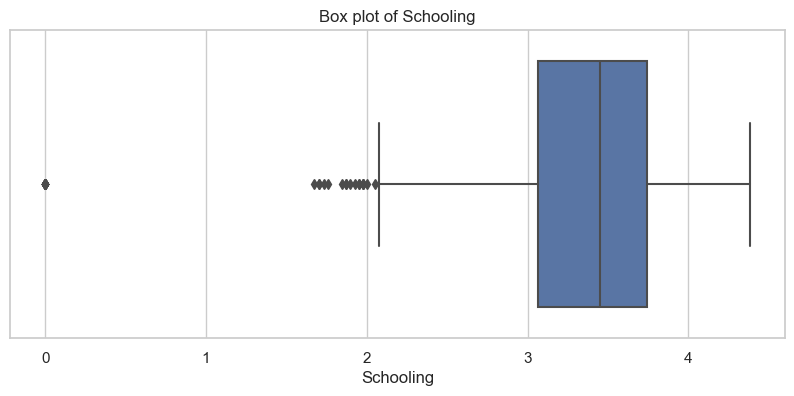

In [746]:
for column in data.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
    plt.show()


    We observed that some of the features(AdultMortality for example) contain outliers which need to
    be processed. 

    We will now create a correlation heat map of all the features to see how one feature has an influence on
    the other features.

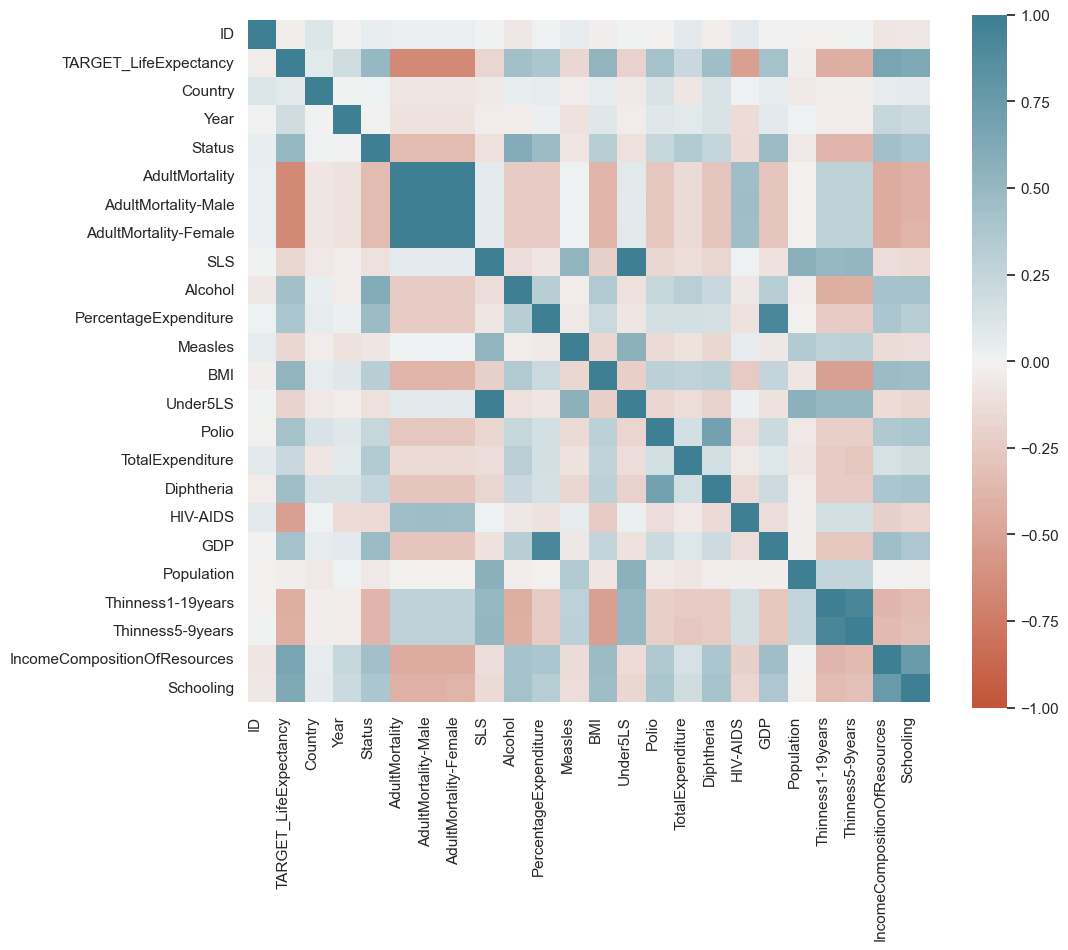

In [747]:

f, ax = plt.subplots(figsize=(11, 9))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

    We can run the following code to check which data have high correlation values (>0.8).

In [748]:
corr_matrix = data.corr()

# Find features with correlation greater than 0.8
high_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                      .stack()
                      .sort_values(ascending=False))

# Filter pairs with high correlation
high_corr_pairs = high_corr[high_corr >= 0.8]

print("Highly correlated feature pairs (correlation coefficient >= 0.8):")
print(high_corr_pairs)

Highly correlated feature pairs (correlation coefficient >= 0.8):
AdultMortality         AdultMortality-Male      0.997920
                       AdultMortality-Female    0.997898
SLS                    Under5LS                 0.996914
AdultMortality-Male    AdultMortality-Female    0.991644
Thinness1-19years      Thinness5-9years         0.930490
PercentageExpenditure  GDP                      0.922500
dtype: float64


    We observed the following had high correlation:
    AdultMortality has high correlation with AdultMortality-Male and AdultMortality-Female.
    SLS has high correlation with Under5LS
    Thinness1-19years has high correlation with Thinness5-9years
    PercentageExpenditure has high correlation with GDP

## Training and Test set

    We will now split the data into train, validation and test datasets (60% Train - 20% validation - 20% Test).


In [749]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3890097
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=3890097
)

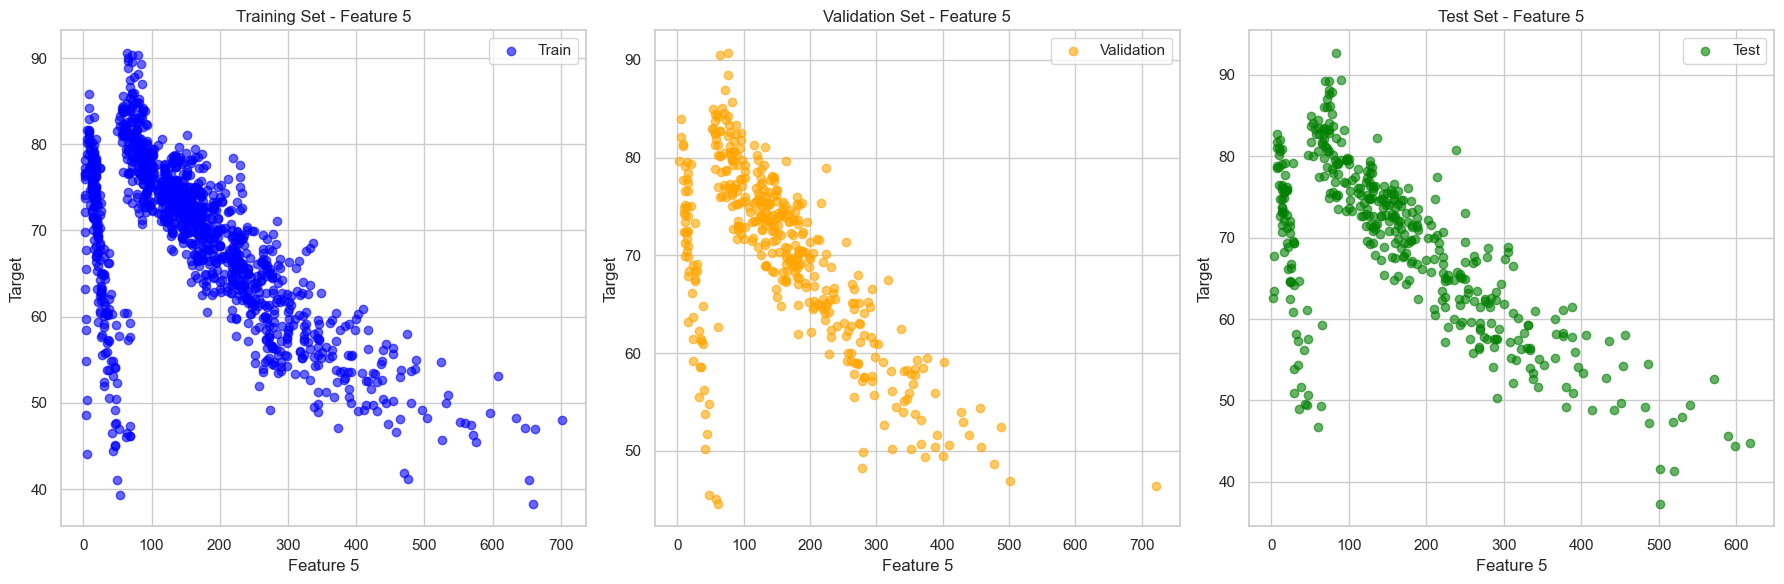

In [750]:
import matplotlib.pyplot as plt

features_to_plot = [5] 
for i, feature_idx in enumerate(features_to_plot):
    plt.figure(figsize=(18, 6))

    # Plot for training set
    plt.subplot(1, 3, 1)
    plt.scatter(X_train.iloc[:, feature_idx], y_train, alpha=0.6, label='Train', color='blue')
    plt.title(f'Training Set - Feature {feature_idx}')
    plt.xlabel(f'Feature {feature_idx}')
    plt.ylabel('Target')
    plt.legend()

    # Plot for validation set
    plt.subplot(1, 3, 2)
    plt.scatter(X_val.iloc[:, feature_idx], y_val, alpha=0.6, label='Validation', color='orange')
    plt.title(f'Validation Set - Feature {feature_idx}')
    plt.xlabel(f'Feature {feature_idx}')
    plt.ylabel('Target')
    plt.legend()

    # Plot for test set
    plt.subplot(1, 3, 3)
    plt.scatter(X_test.iloc[:, feature_idx], y_test, alpha=0.6, label='Test', color='green')
    plt.title(f'Test Set - Feature {feature_idx}')
    plt.xlabel(f'Feature {feature_idx}')
    plt.ylabel('Target')
    plt.legend()

    plt.tight_layout()
    plt.show()



    We can view the number of instances for each split using the following code.

In [751]:

print("Nunber of instances in the original dataset is {}. After spliting Train has {} instances, Validation has {} instances and test has {} instances."
      .format(data.shape[0], X_train.shape[0], X_val.shape[0], X_test.shape[0]))


Nunber of instances in the original dataset is 2071. After spliting Train has 1242 instances, Validation has 414 instances and test has 415 instances.


## Baseline model

    For my baseline model, I have decided to train the data into a linear regression model. 
    We will now perform the linear regression without any scaling or feature selection.

In [752]:

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
val_predictions = model.predict(X_val)

# Evaluate the model on the validation set
val_mse = mean_squared_error(y_val, val_predictions)
val_r_squared = r2_score(y_val, val_predictions)
print(f"Validation Mean Squared Error: {val_mse}")
print(f"Validation R-squared value: {val_r_squared}")

# Check if performance criteria are met
if val_mse < 25 and val_r_squared > 0.7:
    
    print("\nCriteria met. Proceeding to evaluate on the test set.\n")
    
    # Make predictions on the test set
    test_predictions = model.predict(X_test)
    
    # Evaluate the model on the test set
    test_mse = mean_squared_error(y_test, test_predictions)
    test_r_squared = r2_score(y_test, test_predictions)
    print(f"Test Mean Squared Error: {test_mse}")
    print(f"Test R-squared value: {test_r_squared}")
    
    # Calculate residuals based on the test set
    residuals = y_test - test_predictions
    
    # Calculate standard deviation of residuals
    std_residuals = np.std(residuals)
    print(f"Standard Deviation of Residuals: {std_residuals}")
    
else:
    print("Criteria not met. Consider revising the model or parameters.")


Validation Mean Squared Error: 18.496467086264893
Validation R-squared value: 0.7748100997336658

Criteria met. Proceeding to evaluate on the test set.

Test Mean Squared Error: 23.80947775379669
Test R-squared value: 0.7662577793419321
Standard Deviation of Residuals: 4.878795414461385


    We now have a base understanding of how our linear regression model performs. 
    For our test set, we observed:
    We calculated the Mean Squared Error to be 23.80947775379669 which is a relatively low and hence good
    base value.
    We calculated the R-squared value to be 0.7662577793419321 which is average as well.
    We calculated the Standard Deviation of Residuals to be 4.878795414461385.

    Let us have a visual representation of the actual vs the predicted values using a scatter plot and  
    a residual plot

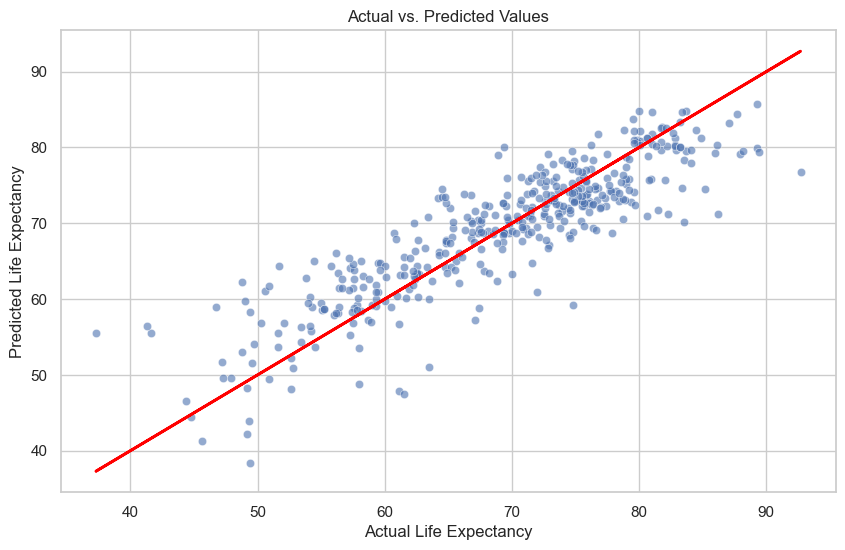

In [753]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=test_predictions, alpha=0.6)
plt.plot(y_test, y_test, color='red', linewidth=2)  
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.show()


    We can observe here that there is a positive linear relation between the actual and the predicted value.
    The plots have a wide distribution which suggests that the model demonstrates the general trend, however 
    it fails to account for all the variability in the data.
    
    
    

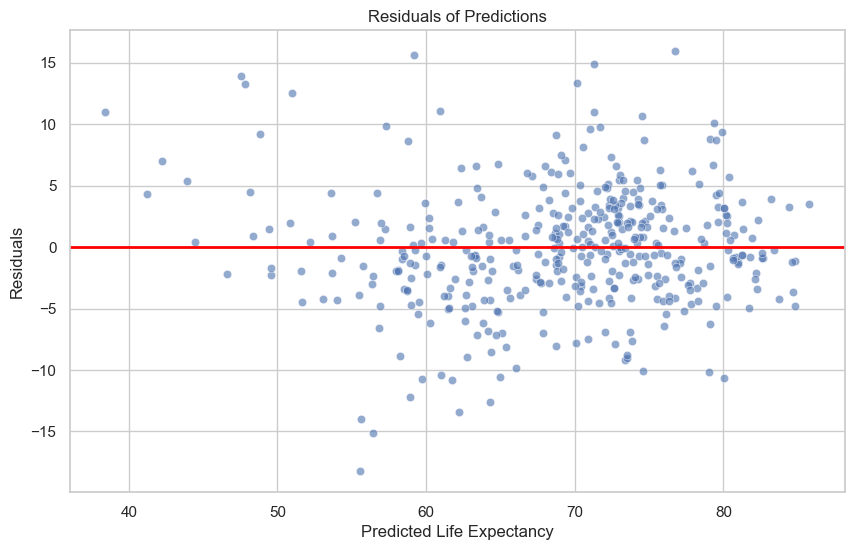

In [754]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_predictions, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linewidth=2) 
plt.title('Residuals of Predictions')
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')
plt.show()


    From this residual graph we can observe that the residuals are centered around the red line at y=0.
    This suggests that there's no systematic bias in the predictions—on average, the model does not consistently
    overpredict or underpredict.



## Feature Scaling

    Now, we will perform feature scaling using Power Transformer and min-max scaling on all the split sets.
    
    Power Transformer will allow us to make the data more Gaussian-like which in turn will allow us to 
    reduce the skewness.
    Min-Max scaling will allow us to transform the values of numerical features in a dataset to a common scale.

In [755]:


# Apply Power Transformation to the skewed features
X_train_power_transformed = power_transformer.fit_transform(X_train)
X_val_power_transformed = power_transformer.transform(X_val)  
X_test_power_transformed = power_transformer.transform(X_test)

# Apply Min-Max Scaling on the power-transformed features
X_train_scaled = min_max_scaler.fit_transform(X_train_power_transformed)
X_val_scaled = min_max_scaler.transform(X_val_power_transformed) 
X_test_scaled = min_max_scaler.transform(X_test_power_transformed)


    We will now train the scaled data on our baseline Linear regression model.

In [756]:


model_transformed = LinearRegression()

# Train the model on the scaled features
model_transformed.fit(X_train_scaled, y_train)

# First, make predictions on the validation set
val_predictions = model_transformed.predict(X_val_scaled)

# Evaluate the model performance on the validation set
val_mse = mean_squared_error(y_val, val_predictions)
val_r2 = r2_score(y_val, val_predictions)

print(f'Validation Mean Squared Error: {val_mse}')
print(f'Validation R-squared: {val_r2}')

if val_mse < 25 and val_r2 > 0.7:
    print("\nCriteria met. Proceeding to evaluate on the test set.\n")
    # Make predictions on the test set
    test_predictions = model_transformed.predict(X_test_scaled)
    
    # Evaluate the model performance on the test set
    test_mse = mean_squared_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    
    print(f'Test Mean Squared Error: {test_mse}')
    print(f'Test R-squared: {test_r2}')
else:
    print("Model performance on validation set did not meet criteria. Consider model adjustments.")


Validation Mean Squared Error: 17.14317656601292
Validation R-squared: 0.7912860762466734

Criteria met. Proceeding to evaluate on the test set.

Test Mean Squared Error: 22.85917599088489
Test R-squared: 0.7755870744510136


    For our test set, can observe that after feature scaling was conducted, the MSE value has decreased to
    22.85917599088489
    and the R-squared value has increased to 0.7755870744510136 which indicate improvement in our
    model's performance.

## Regularization 

    We will now apply regularization using the Ridge regression to address potential overfitting and improve 
    the model's generalization ability

In [757]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Base alpha value selected at 0.1
alpha = 0.1  

# Initializing and training the Ridge model
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

# Making predictions on the validation set
ridge_val_predictions = ridge_model.predict(X_val_scaled)

# Evaluating the model on the validation set
ridge_val_mse = mean_squared_error(y_val, ridge_val_predictions)
ridge_val_r2 = r2_score(y_val, ridge_val_predictions)

print(f"Validation Ridge MSE: {ridge_val_mse}")
print(f"Validation Ridge R-squared: {ridge_val_r2}")

# Check to see if the validation performance is satisfactory
if ridge_val_mse < 25 and ridge_val_r2 > 0.7:
    
    print("\nCriteria met. Proceeding to evaluate on the test set.\n")
    
    # Making predictions on the test set
    ridge_test_predictions = ridge_model.predict(X_test_scaled)
    
    # Evaluating the model on the test set
    ridge_test_mse = mean_squared_error(y_test, ridge_test_predictions)
    ridge_test_r2 = r2_score(y_test, ridge_test_predictions)
    
    print(f"Test Ridge MSE: {ridge_test_mse}")
    print(f"Test Ridge R-squared: {ridge_test_r2}")
    
else:
    print("Model performance on validation set did not meet criteria. Consider model adjustments.")


Validation Ridge MSE: 17.563423534515586
Validation Ridge R-squared: 0.7861696736124308

Criteria met. Proceeding to evaluate on the test set.

Test Ridge MSE: 22.946263295314633
Test Ridge R-squared: 0.7747321216402453


    We can observe that the MSE value has slightly increased to 22.946263295314633 and the R-squared value
    has slightly decreased to 0.7747321216402453, and even thought the difference is very minor, it relays the
    fact that our model is not performing at its best.
    Let us now try changing our alpha value to find the optimum alpha for our model.

## Hyperparameter tuning

    We will be performing a grid search to find the optimum alpha value for our Ridge Regression model.

In [758]:
# Generate alpha values for Ridge
alpha_values = np.logspace(-5, 1, num=25)

# Setup the parameter grid for Ridge
param_grid_ridge = {'alpha': alpha_values}

# Initialize GridSearchCV for Ridge regression
grid_search_ridge = GridSearchCV(Ridge(random_state=3890097), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the scaled training data
grid_search_ridge.fit(X_train_scaled, y_train)

# Evaluate the best Ridge model on the validation set instead of the test set
best_model_ridge = grid_search_ridge.best_estimator_
val_predictions_ridge = best_model_ridge.predict(X_val_scaled)
val_mse_ridge = mean_squared_error(y_val, val_predictions_ridge)
val_r2_ridge = r2_score(y_val, val_predictions_ridge)

print("Validation MSE for Best Ridge Model:", val_mse_ridge)
print("Validation R-squared for Best Ridge Model:", val_r2_ridge)

# Fit GridSearchCV to the scaled training data
grid_search_ridge.fit(X_train_scaled, y_train)

# Best alpha value found
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
print("Best alpha for Ridge:", best_alpha_ridge)

# Best mean cross-validated score (negative MSE)
best_score_ridge = grid_search_ridge.best_score_
print("Best Mean Squared Error for Ridge:", -best_score_ridge)

# Evaluate the best Ridge model on the test set
best_model_ridge = grid_search_ridge.best_estimator_
predictions_ridge = best_model_ridge.predict(X_test_scaled)
mse_test_ridge = mean_squared_error(y_test, predictions_ridge)
r2_test_ridge = r2_score(y_test, predictions_ridge)

print("Test MSE for Best Ridge Model:", mse_test_ridge)
print("Test R-squared for Best Ridge Model:", r2_test_ridge)




Validation MSE for Best Ridge Model: 17.1696864058348
Validation R-squared for Best Ridge Model: 0.7909633255204009
Best alpha for Ridge: 1e-05
Best Mean Squared Error for Ridge: 20.925099247848365
Test MSE for Best Ridge Model: 22.836952288445968
Test R-squared for Best Ridge Model: 0.7758052488105285


    We have found our best alpha to be 0.00001 which is saved as best_alpha_ridge as when using this alpha
    on the test, we got a MSE value of 22.836952288445968 which is lower than what we got with alpha value
    of 0.1. 
    The R-squared value also increased to 0.7758052488105285.

    We can visualize this change using a scatter plot graph

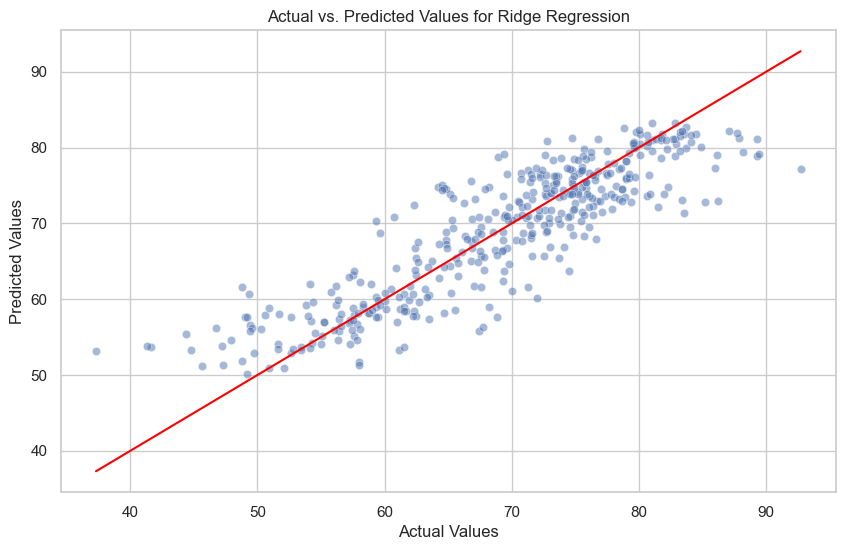

In [759]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions_ridge, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Ridge Regression')
plt.show()


    As we can observe, the plots are more close to the red line which tells us that this is a decent fit for the 
    model. We can also observe that the plots are not distributed very wide meaning the model's errors 
    are within a reasonable range. 

## Validation

     We will now conduct a k-fold validation to check if the model performs well with unseen data. 

In [760]:


kf = KFold(n_splits=5, shuffle=True, random_state=3890097)  
mse_scores = []  # To store the MSE scores for each fold
rmse_scores = []  # To store the RMSE scores for each fold
r2_scores = []  # To store the R-squared scores for each fold

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X_train_scaled):
    # Split data into training/testing sets for the current fold
    X_train_k, X_test_k = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_k, y_test_k = y_train.iloc[train_index], y_train.iloc[test_index]

    # Initialize and train the Ridge regression model on the training set
    model = Ridge(alpha=0.1)  
    model.fit(X_train_k, y_train_k)  

    # Predict on the testing set for the current fold
    predictions_k = model.predict(X_test_k)

    # Calculate and store the MSE for the current fold
    mse_k = mean_squared_error(y_test_k, predictions_k)
    mse_scores.append(mse_k)

    # Calculate RMSE for the current fold and store it
    rmse_scores.append(np.sqrt(mse_k))

    # Calculate and store the R-squared value for the current fold
    r2_k = r2_score(y_test_k, predictions_k)
    r2_scores.append(r2_k)

# Calculate the average MSE, RMSE, and R-squared across all folds
average_mse = np.mean(mse_scores)
average_rmse = np.mean(rmse_scores)
average_r2 = np.mean(r2_scores)

# Calculate the standard deviation of MSE, RMSE, and R-squared
std_mse = np.std(mse_scores)
std_rmse = np.std(rmse_scores)
std_r2 = np.std(r2_scores)

print(f"Average MSE: {average_mse}, Std. Dev. MSE: {std_mse}")
print(f"Average RMSE: {average_rmse}, Std. Dev. RMSE: {std_rmse}")
print(f"Average R-squared: {average_r2}, Std. Dev. R-squared: {std_r2}")





Average MSE: 21.240617842809538, Std. Dev. MSE: 0.5045307673493767
Average RMSE: 4.608430238137583, Std. Dev. RMSE: 0.05466793419110618
Average R-squared: 0.7574484867629651, Std. Dev. R-squared: 0.019001507082438453


    We observed the average MSE value of 21.240617842809538 and the average R-squared value of 0.757448486762965
    which indicate that our model is, on average, performing much better than our linear regression model.
    We can conclude that the Ridge Regression model is the best model for us.

    Let us visually observe this using a box plot.

## Prediction

    Using our trained model, we will now attempt to predict the target value for our test.csv file

In [761]:



new_data = pd.read_csv('./dataset/test.csv', delimiter=',')

ids = new_data['ID']

# Drop 'TARGET_LifeExpectancy' if it exists and is not needed for prediction
new_data_prepared = new_data.drop(['TARGET_LifeExpectancy'], axis=1, errors='ignore')

# Apply Power Transformation and Min-Max Scaling to the new data
new_data_power_transformed = power_transformer.transform(new_data_prepared.drop('ID', axis=1))
new_data_scaled = min_max_scaler.transform(new_data_power_transformed)

# Make predictions with the preprocessed new data using the already trained Ridge model
predictions = ridge_model.predict(new_data_scaled)

# Create a DataFrame for outputting predictions, including the 'ID' column
output_df = pd.DataFrame({'ID': ids, 'TARGET_LifeExpectancy': predictions})

# Save the predictions to a new CSV file
output_df.to_csv('TARGET_LifeExpectancy.csv', index=False)

